In [ ]:
#!pip install mapie scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.6/178.6 kB 3.4 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression

from mapie.metrics import regression_coverage_score
from mapie.regression import MapieRegressor

In [ ]:
# iid data
regressor = LinearRegression()
X, y = make_regression(n_samples=500, n_features=1, noise=20, random_state=59)

In [ ]:
alpha = [0.05, 0.15]

mapie = MapieRegressor(regressor, method="plus") # Conformalized Quantile Regression Method
mapie.fit(X, y)
y_pred, y_pis = mapie.predict(X, alpha=alpha)

coverage_scores = [
    regression_coverage_score(y, y_pis[:, 0, i], y_pis[:, 1, i])
    for i, _ in enumerate(alpha)]

/usr/local/lib/python3.10/dist-packages/mapie/utils.py:620: UserWarning: WARNING: The predictions are ill-sorted.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/mapie/utils.py:620: UserWarning: WARNING: The predictions are ill-sorted.
  warnings.warn(


This warning is expected from the documentation... ?

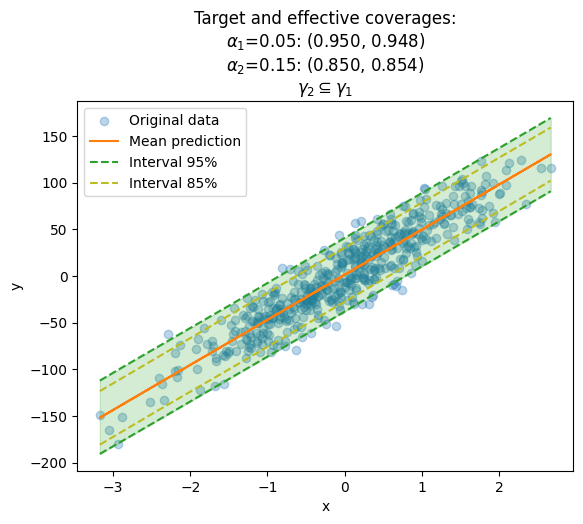

In [ ]:
# Plot predictions and prediction intervals
plt.xlabel("x")
plt.ylabel("y")
plt.scatter(X, y, alpha=0.3, label="Original data")
plt.plot(X, y_pred, color="C1", label="Mean prediction")

order = np.argsort(X[:, 0])  # Sort for continuous line plots

# Prediction interval for alpha[0]
plt.plot(X[order], y_pis[order][:, 0, 0], color="C2", ls="--", label=f"Interval {1-alpha[0]:.0%}")
plt.plot(X[order], y_pis[order][:, 1, 0], color="C2", ls="--")

# Prediction interval for alpha[1]
plt.plot(X[order], y_pis[order][:, 0, 1], color="C8", ls="--", label=f"Interval {1-alpha[1]:.0%}")
plt.plot(X[order], y_pis[order][:, 1, 1], color="C8", ls="--")

# Shaded area for the wider interval
plt.fill_between(
    X[order].ravel(),
    y_pis[order][:, 0, 0].ravel(),
    y_pis[order][:, 1, 0].ravel(),
    color="C2", alpha=0.2
)

containment_text = r"$\gamma_2 \subseteq \gamma_1$"

plt.legend()
plt.title(
    f"Target and effective coverages:\n"
    f"$\\alpha_1$={alpha[0]:.2f}: ({1-alpha[0]:.3f}, {coverage_scores[0]:.3f})\n"
    f"$\\alpha_2$={alpha[1]:.2f}: ({1-alpha[1]:.3f}, {coverage_scores[1]:.3f})\n"
    f"{containment_text}"
)
plt.show()